In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Extraction

In [3]:
data = pd.read_csv('/Users/rohanpatil/Desktop/ai_ml_projects/practise_projects/Ames_Housing_Data.csv')

# 2. Data Analysis

In [4]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
data['Sale Condition'].value_counts()

Sale Condition
Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

In [9]:
data.groupby('Sale Condition')['SalePrice'].mean()

Sale Condition
Abnorml    140396.252632
AdjLand    108916.666667
Alloca     161843.708333
Family     157488.586957
Normal     175567.643183
Partial    273374.371429
Name: SalePrice, dtype: float64

<Axes: xlabel='Sale Condition', ylabel='SalePrice'>

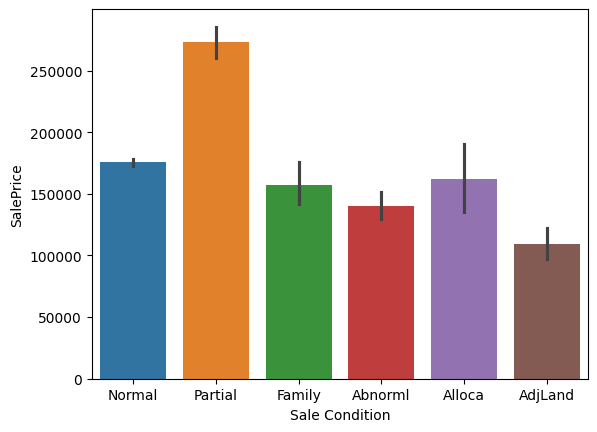

In [11]:
sns.barplot(data = data, x = 'Sale Condition', y = 'SalePrice', hue = 'Sale Condition')

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

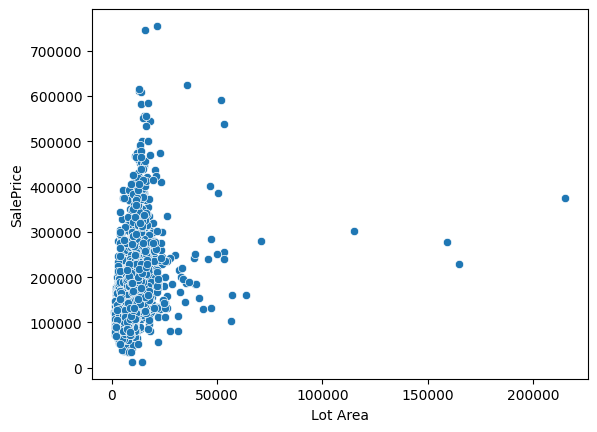

In [13]:
sns.scatterplot(data = data, y = 'SalePrice', x = 'Lot Area')

In [14]:
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

<Axes: xlabel='Year Built'>

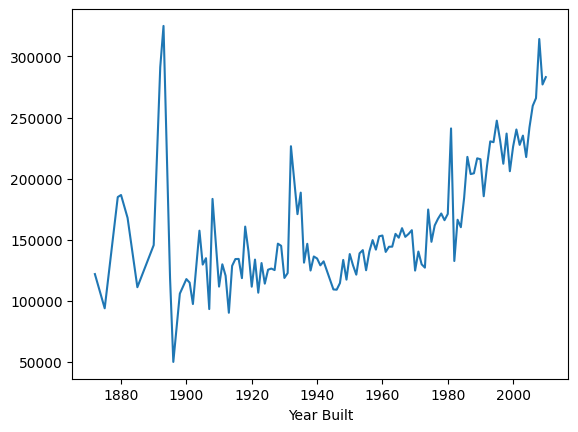

In [16]:
data.groupby(['Year Built'])['SalePrice'].mean().plot(kind='line')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

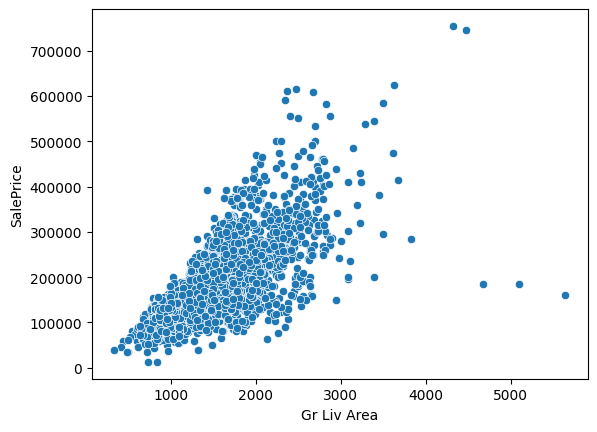

In [21]:
sns.scatterplot(data = data, x = 'Gr Liv Area', y = 'SalePrice')

In [29]:
data['Overall Qual'].value_counts()

Overall Qual
5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: count, dtype: int64

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

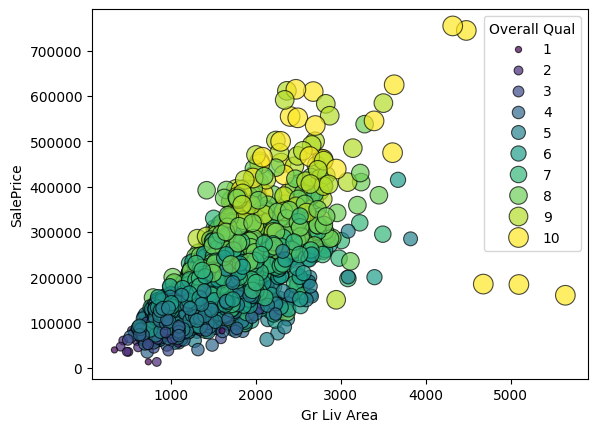

In [31]:
sns.scatterplot(data = data, x = 'Gr Liv Area', y = 'SalePrice', size = 'Overall Qual', hue = 'Overall Qual', palette = 'viridis', sizes=(20, 200), alpha=0.7, edgecolor='k', legend='full')

# 3. Feature Engg

In [32]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [35]:
data.shape

(2930, 81)

In [56]:
drop_lists = data.isna().sum().sort_values(ascending=False).head(20).sort_values(ascending=True).head(10).index 

In [57]:
drop_lists

Index(['BsmtFin SF 2', 'Total Bsmt SF', 'Electrical', 'Garage Cars',
       'Garage Area', 'Bsmt Unf SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Mas Vnr Area', 'Bsmt Qual'],
      dtype='object')

In [ ]:
data.dropna(subset=drop_lists + ['Bsmt Exposure', 'BsmtFin Type 2'], inplace=True)

In [65]:
data.dropna(subset = ['Bsmt Exposure', 'BsmtFin Type 2'], inplace=True)

In [43]:
data.drop(columns = ['Mas Vnr Type'], inplace=True)

In [39]:
data.drop(columns =['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace=True)

In [66]:
data.isna().sum().sort_values(ascending=False).head(10)

Lot Frontage       470
Garage Finish      143
Garage Cond        143
Garage Qual        143
Garage Yr Blt      143
Garage Type        142
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       0
dtype: int64

In [67]:
data['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2821, dtype: float64

# If the data is skewed then impute the missing values with "Median" if not then with "mean".

In [74]:
lot_front_mean = data['Lot Frontage'].mean()

In [72]:
lot_front_median = data['Lot Frontage'].median()

In [77]:
data['Lot Frontage'].fillna(lot_front_median)

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926     68.0
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2821, dtype: float64

<Axes: ylabel='Frequency'>

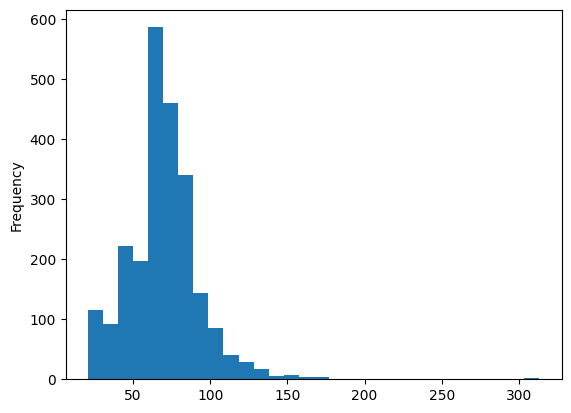

In [78]:
data['Lot Frontage'].plot(kind='hist', bins=30)

In [79]:
q1 = data['Lot Frontage'].quantile(0.25)
q3 = data['Lot Frontage'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Lot Frontage'] >= lower_bound) & (data['Lot Frontage'] <= upper_bound)]

<Axes: ylabel='Frequency'>

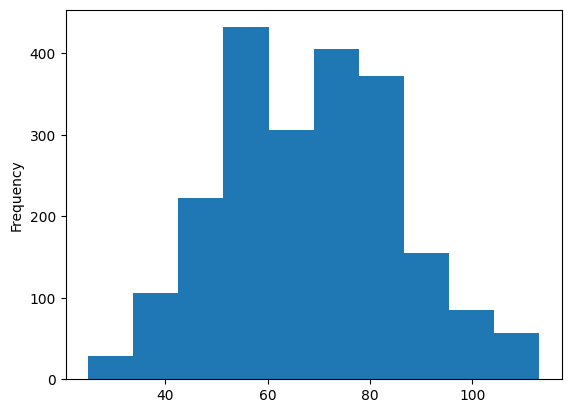

In [81]:
data['Lot Frontage'].plot(kind='hist', bins=10)

In [86]:
data.isna().sum().sort_values(ascending=False).head().index

Index(['Garage Finish', 'Garage Cond', 'Garage Qual', 'Garage Yr Blt',
       'Garage Type'],
      dtype='object')

In [87]:
data.dropna(subset = data.isna().sum().sort_values(ascending=False).head().index, inplace=True)

In [89]:
data.isna().sum().sort_values(ascending=False)

PID              0
Garage Yr Blt    0
Fireplaces       0
Functional       0
TotRms AbvGrd    0
                ..
Mas Vnr Area     0
Exterior 2nd     0
Exterior 1st     0
Roof Matl        0
SalePrice        0
Length: 75, dtype: int64

## 1) Drop 2) fillna : mean | median | mode 

In [90]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500


# 4. Model Building

In [95]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500


In [91]:
x = data.drop(columns = ['SalePrice', 'PID'])
y = data['SalePrice'].values

In [96]:
x_transformed = pd.get_dummies(x)

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42)

## 1. Linear Regression

# 2. Tree

# 3. Random Forest

## 4. Gradient Boosting

In [ ]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()

# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor()

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(x_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [122]:
y_pred = model.predict(x_test)

# 5. Model Evalution

#### 1. MSE 2. MAE 3.RMSE 4. R2 score 

In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [124]:
mean_squared_error(y_test, y_pred)

516798232.2491467

In [125]:
np.sqrt(mean_squared_error(y_test, y_pred))

22733.19670106135

In [126]:
mean_absolute_error(y_test, y_pred)

14812.55790402353

In [127]:
r2_score(y_test, y_pred)

0.9352868065548173

In [ ]:
## Gradient Boosting > Random Forest > Linear Regression > Decision Tree